## Find Cluster Centers

Given the data points:

np.array([[1,2], [1.5,1.8], [5,8], [8,8], [1,0.6], [9,11]])
Find the centres of the clusters if 2 clusters are used to define the K means algorithm.

Also plot the graph showing clusters and their centres.

Output
Print cluster centres as
[[x1, y1]
 [x2, y2]]

[[1.16666667 1.46666667]
 [7.33333333 9.        ]]


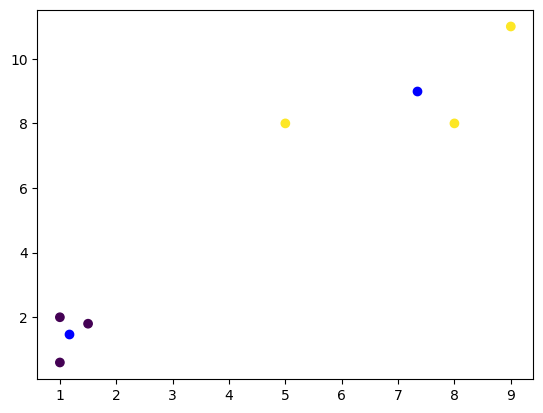

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

d = np.array([[1,2], [1.5,1.8], [5,8], [8,8], [1,0.6], [9,11]])

model = KMeans(n_clusters = 2, n_init = 10)
model.fit(d)

centers = model.cluster_centers_

print(centers)

plt.scatter(d[:, 0], d[:, 1], c = model.labels_)
plt.scatter(centers[:, 0], centers[:, 1], c = 'b')
plt.show()

## Self implementation of KMeans

Given the data points:

np.array([[1,2], [1.5,1.8], [5,8], [8,8], [1,0.6], [9,11]])
Implement the "fit" and "predict" functions inside the kMeans class template provided.

Note: All the inputs and outputs to the class are handled, you just need to implement the functionality of "fit" and "predict" functions.

Output:
Print the predicted clusters for each data point
Print the centres of these clusters.

In [14]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[1,2], [1.5,1.8], [5,8], [8,8], [1,0.6], [9,11]])
class K_Means:
  def __init__(self, k = 2, max_iter = 100):
    self.k = k
    self.max_iter = max_iter
  def fit (self, data):
    self.means = []
    # randomly initialize the means
    for i in range(self.k):
      self.means.append(data[i])
    for i in range(self.max_iter):
      # assign the data points to the cluster that they belong to
      # create empty clusters
      clusters = []
      for j in range(self.k):
        clusters.append([])
      for point in data:
        # find distance to all the mean values
        distances = [((point - m)**2).sum() for m in self.means]
        # find the min distance
        minDistance = min(distances)
        # find the mean for which we got the minimum distance --> l
        l = distances.index(minDistance)
        # add this point to cluster l
        clusters[l].append(point)
      # calculate the new mean values
      change = False
      for j in range(self.k):
        new_mean = np.average(clusters[j], axis=0)
        if not np.array_equal(self.means[j], new_mean):
          change = True
        self.means[j] = new_mean
      if not change:
        break
  def predict(self, test_data):
    predictions = []
    for point in test_data:
      # find distance to all the mean values
      distances = [((point - m)**2).sum() for m in self.means]
      # find the min distance
      minDistance = min(distances)
      # find the mean for which we got the minimum distance --> l
      l = distances.index(minDistance)
      # add this point to cluster l
      predictions.append(l)
    return predictions
kmeans = K_Means(2, 10)
kmeans.fit(X)
print(kmeans.predict(X))
print(kmeans.means)

[0, 0, 1, 1, 0, 1]
[array([1.16666667, 1.46666667]), array([7.33333333, 9.        ])]
